## 求解线性系统：2个变量
通过完成本实验，您将能够使用Python和Numpy软件包的基本变成技能来求解线性方程组。在此笔记本中，您将：
* 使用Numpy线性代数包求线性方程组的解
* 使用消元法求线性方程组的解
* 评估矩阵的行列式并检查矩阵奇异性与线性系统解数之间的关系

## 导包
加载`numpy`以访问其函数

In [2]:
import numpy as np

## 使用矩阵表示和求解线性方程组

### 线性方程组
线性方程组涉及到相同变量的一个或多个线性方程的集合，例如
$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}\tag{1}$$
由两个方程组成的方程组，含未知量x1，x2使得所以方程都同时满足

如果线性系统没有解，则它是不一致的，否则成为一致，一致性系统可以有一个或多个解

### 使用矩阵求解线性方程组
`Numpy`线性代数包提供了使用函数`np.linalg.solve(A,b)`求解线性方程组的方法，这是一个$A$矩阵，每行代表系统中的一个方程，每列对应$X1,X2$。$b$是等号右侧的常量的一维数组.有关`np.linalg.solve()`函数的更多信息可参阅文档

给定线性方程组，可以将矩阵$A$和一维数组$b$设置为：

In [3]:
A = np.array([[-1,3],[3,2]],dtype=np.dtype(float))
b = np.array([7,1],dtype=np.dtype(float))

print("矩阵A:")
print(A)
print("\n数组b：")
print(b)

矩阵A:
[[-1.  3.]
 [ 3.  2.]]

数组b：
[7. 1.]


检查$A$和$b$的维度。也可以使用"np.shape()"作为代替
`数组的形状由一个元组来描述，元组中的每个元素代表数组在对应维度上的大小`

In [4]:
print(f"A的形状:{A.shape}")
print(f"b的形状:{b.shape}")

A的形状:(2, 2)
b的形状:(2,)


现在只需使用`np.linalg.solve(A,b)`来找到方程组的解。结果将保存在 1-D 数组$x$中。这些元素对应$x1$$x2$的值：

In [5]:
x = np.linalg.solve(A,b)
print(f"方程组的解是:{x}")

方程组的解是:[-1.  2.]


得出方程组的解后可以代入原始方程组检查

## 使用消元法求解线性方程组
为了更深入地理解数学概念，手动练习一些求解技术很重要

## 消除方法
在消元法中，可以添加或减去方程，获得变量数量较少的方程，可以将整个方程乘以非0数

$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}$$

将第一个方程乘以3，将其添加到第二个方程中，然后将第二个方程与此加法的结果交换：
$$\begin{cases} 
-x_1+3x_2=7, \\ 11x_2=22. \end{cases}\tag{2}$$

从第二个方程中除去了$X1$，很容易得到$X2$的值，将其回代到第一个方程，解得：
$$\begin{cases} 
x_1=-1, \\ x_2=2. \end{cases}\tag{4}$$

## 在代码中实现消除方法的准备工作
以矩阵形式表示方程组，可以使用`np.hstack()`方法将系数矩阵和常量矩阵合并成一个矩阵。请注意，最初定义的数组b的形状是(2,)，要将其与矩阵(2,2)堆叠起来，需要使用`.reshape((2,1))`
和矩阵乘法类似的原则，需要`前列后行`相同

In [6]:
A_system = np.hstack((A,b.reshape((2,1))))
print(A_system)

[[-1.  3.  7.]
 [ 3.  2.  1.]]


提取矩阵的第二行

In [7]:
print(A_system[1])

[3. 2. 1.]


## 消元法实现
让我们对矩阵$A\_System$应用一些操作来消除变量，首先，复制矩阵保持原始矩阵不受任何更改。然后，将第一行乘以3，将其加到第二行上

In [8]:
A_system_res = A_system.copy()

In [9]:
A_system_res[1] = 3 * A_system_res[0] + A_system_res[1]
print(A_system_res)

[[-1.  3.  7.]
 [ 0. 11. 22.]]


乘以第二行1/11

In [10]:
A_system_res[1] = 1/11*A_system_res[1] 
print(A_system_res)

[[-1.  3.  7.]
 [ 0.  1.  2.]]


## 解的图形表示
两个变量的线性方程(此处为x1和x2)在几何上由一条直线表示，该直线上的点(x1,x2)构成方程组的解集。这被称为线性方程的图。在两个方程的系统情况下，每个方程将对应两条直线，解就是直线的交点。

将定义一个函数`plot_lines()`绘制线条，并将其用于表示解，如果下面的单元格中的代码不清楚，请不要担心——在这个阶段，这不是理解的重要代码。

In [11]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]
    
    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b) 
        ax.plot(solution[0], solution[1], '-o', mfc='none', 
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

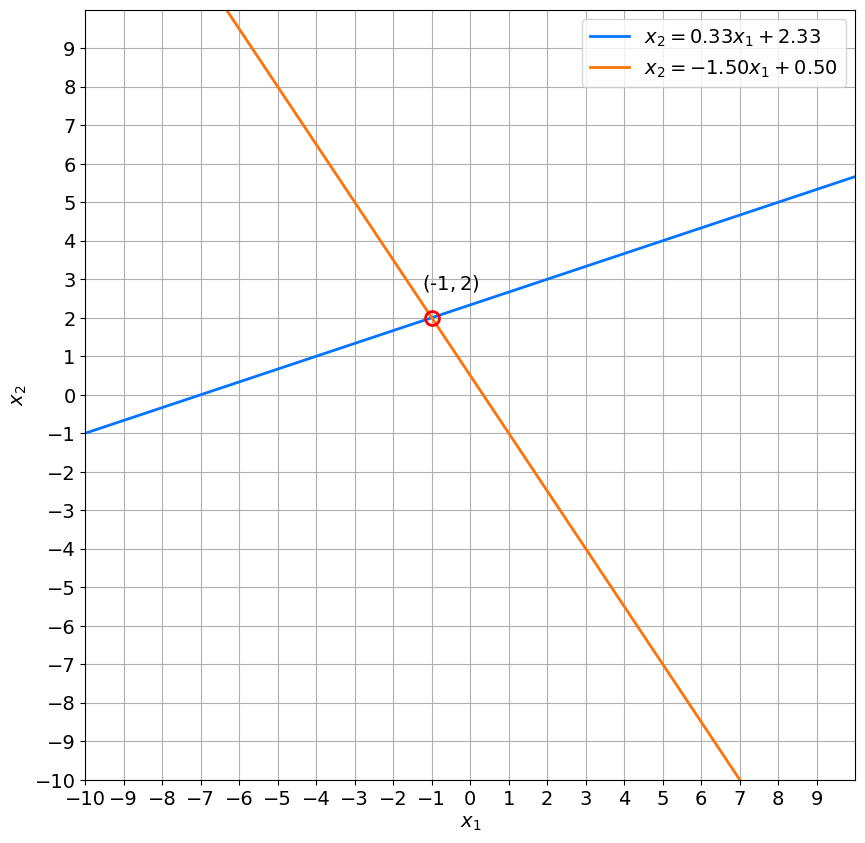

In [12]:
plot_lines(A_system)

## 无解的线性方程组
给定另一个线性方程组:
$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1-9x_2=1, \end{cases}\tag{5}$$
找到相应的矩阵行列式

In [15]:
A_2 = np.array([[-1,3],[3,-9]],dtype=np.dtype(float))
b_2 = np.array([7,1],dtype=np.dtype(float))

# 和b_2无关，行列式的求取函数np.linalg.det()
d_2 = np.linalg.det(A_2)
print(f"矩阵A_2的行列式:{d_2:.2f}")

矩阵A_2的行列式:0.00


解等于0，因此系统不能有一个唯一解。它将有无穷多个解或者没有解。其一致性将取决于常量系数。发现运行`np.linalg.solve()`函数因为奇异性给出错误

In [16]:
try:
    x_2 = np.linalg.solve(A_2, b_2)
except np.linalg.LinAlgError as err:
    print(err)

Singular matrix


准备应用消元法，构建与该线性系统对应的矩阵

In [17]:
A_2_system = np.hstack((A_2,b_2.reshape(2,1)))
print(A_2_system)

[[-1.  3.  7.]
 [ 3. -9.  1.]]


执行消元操作

In [18]:
# 复制矩阵
A_2_system_res = A_2_system.copy()
# 将第一行乘以3加到第二行去
A_2_system_res[1] = 3 * A_2_system_res[0] + A_2_system_res[1]
print(A_2_system_res)

[[-1.  3.  7.]
 [ 0.  0. 22.]]


最后一行对应于方程$0=22$,该方程无解。因此，整个线性方程组无解。如图，两直线不会相交

In [ ]:
plot_lines(A_2_system)

## 无穷多解的线性方程组
改变方程组的常量，可以使其保持一致性`一个或多个解`

$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1-9x_2=-21, \end{cases}\tag{6}$$

In [ ]:
b_3 = np.array([7,-21],dtype=np.dtype(float))

准备对应与方程组(6)的新矩阵

In [ ]:
A_3_system = np.hstack((A_2,b_3.reshape(2,1)))
print(A_3_system)

使用初等运算进行消元

In [ ]:
# 复制矩阵
A_3_system_res = A_3_system.copy()

# 将第一行乘以3加到第二行去
A_3_system_res[1] = 3 * A_3_system_res[0] + A_3_system_res[1]
print(A_3_system_res)

因此，从相应的线性方程组中
$$\begin{cases} 
-x_1+3x_2=7, \\ 0=0, \end{cases}\tag{7}$$
线性方程组的解为
$$x_1=3x_2-7, \tag{8}$$
$X2$是任何实数，$X1$也会相应改变

In [ ]:
plot_lines(A_3_system)